In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/current-daily-price-of-various-commodities-india/daily_price.csv


# Project Summary

Project Summary: Exploratory Data Analysis (EDA) of Daily Prices of Commodities in India

The goal of this project is to perform an exploratory data analysis (EDA) on a dataset that contains daily prices of various commodities in India across different states and districts. The dataset includes information such as the wholesale maximum price, minimum price, and modal price for each commodity on a daily basis.

The EDA process will involve several key steps to gain insights and understand the characteristics of the dataset. Here is an outline of the EDA process for this project:

**Data Collection:** Acquire the dataset containing daily commodity prices in India for different states and districts. The dataset may be obtained from reliable sources such as government databases, market reports, or research organizations.

**Data Cleaning and Preprocessing:** This step involves cleaning the dataset to handle missing values, outliers, and inconsistencies. Data preprocessing techniques such as data normalization, standardization, and feature engineering may be applied as needed.

**Descriptive Statistics:** Calculate descriptive statistics for the dataset, including measures such as mean, median, mode, standard deviation, and range. This will provide an initial understanding of the distribution and central tendencies of the commodity prices.

**Data Visualization:** Create visual representations of the data using plots, charts, and graphs. Visualizations like line charts, box plots, scatter plots, and histograms can be used to analyze trends, distributions, and relationships between variables.

**Temporal Analysis:** Explore the temporal aspects of the data by examining the price fluctuations over time. This analysis can reveal seasonal patterns, trends, and any cyclical behavior in the commodity prices.

**Regional Analysis:** Analyze the variations in commodity prices across different states and districts. Compare the maximum, minimum, and modal prices across regions to identify any significant differences or similarities. Heatmaps, bar charts, and geographical visualizations can aid in this analysis.

**Correlation Analysis:** Investigate the relationships between commodity prices and other relevant factors. For example, explore the correlation between commodity prices and factors such as supply, demand, market conditions, or weather patterns.

**Outlier Detection:** Identify and analyze any outliers in the dataset that may significantly deviate from the expected price range. Determine whether these outliers are valid data points or anomalies that need to be addressed.

**Key Findings and Insights:** Summarize the key findings from the EDA, including notable trends, patterns, and relationships discovered during the analysis. Provide insights and recommendations based on the analysis results.

**Conclusion:** Conclude the EDA project by summarizing the main outcomes, limitations, and potential areas for further investigation. Reflect on the significance of the analysis in understanding the daily commodity prices in India and its implications for various stakeholders.

By conducting this EDA on the daily commodity prices dataset, valuable insights can be gained, which can be useful for policymakers, traders, farmers, and other stakeholders involved in the agricultural and commodity markets in India.

# About Dataset

The data refers to Daily prices of various commodities in India of all the states and districts. It has the wholesale maximum price, minimum price and modal price on daily basis. This dataset is generated through the AGMARKNET Portal (http://agmarknet.gov.in), which disseminates daily market information of various commodities.

According to the AGMARKNET Portal, the prices in the dataset refer to the wholesale prices of various commodities per quintal (100 kg) in Indian rupees. The wholesale price is the price at which goods are sold in large quantities to retailers or distributors.

# Business Objective

**Market analysis:** You can use this dataset to analyze trends and patterns in the wholesale prices of various commodities across different markets in India. This can help you understand factors that affect prices, such as supply and demand, seasonality, and market conditions.

**Commodity recommendation:** Develop recommender systems that suggest the best markets or commodities for farmers or traders to sell or buy based on their location, preferences, and market conditions.

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load the dataset
df=pd.read_csv("/kaggle/input/current-daily-price-of-various-commodities-india/daily_price.csv")
df.head()

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,3200.0,3400.0,3200.0
1,Andhra Pradesh,Chittor,Chittoor,Mango,Neelam,Medium,700.0,1500.0,1200.0
2,Andhra Pradesh,Chittor,Chittoor,Mango,Totapuri,Medium,1400.0,1800.0,1600.0
3,Andhra Pradesh,Cuddapah,Cuddapah,Groundnut,Local,FAQ,4059.0,7589.0,7559.0
4,Andhra Pradesh,Cuddapah,Cuddapah,Turmeric,Bulb,FAQ,4778.0,6160.0,5845.0


In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        5557 non-null   object 
 1   District     5557 non-null   object 
 2   Market       5557 non-null   object 
 3   Commodity    5557 non-null   object 
 4   Variety      5557 non-null   object 
 5   Grade        5557 non-null   object 
 6   Min Price    5557 non-null   float64
 7   Max Price    5557 non-null   float64
 8   Modal Price  5557 non-null   float64
dtypes: float64(3), object(6)
memory usage: 390.9+ KB


In [5]:
#how many rows and columns
df.shape

(5557, 9)

In [6]:
#find null values sum
df.isnull().sum()

State          0
District       0
Market         0
Commodity      0
Variety        0
Grade          0
Min Price      0
Max Price      0
Modal Price    0
dtype: int64

In [7]:
#about the dataset variables
df.describe()

,Min Price,Max Price,Modal Price
count,5557.000000,5557.000000,5557.000000
mean,4109.732091,4694.127320,4417.495256
std,4667.234302,5236.560123,4962.823629
min,0.000000,0.000000,0.720000
25%,1700.000000,2000.000000,1900.000000
50%,2660.000000,3100.000000,3000.000000
75%,5300.000000,5950.000000,5550.000000
max,95000.000000,115000.000000,110000.000000


In [8]:
#list of dataset column
list(df.columns)

['State',
 'District',
 'Market',
 'Commodity',
 'Variety',
 'Grade',
 'Min Price',
 'Max Price',
 'Modal Price']

In [9]:
#find unique vaule of each variable
df.nunique()

State           23
District       245
Market         531
Commodity      186
Variety        293
Grade            4
Min Price      855
Max Price      947
Modal Price    991
dtype: int64

# ******Variables Description

****State: The state in India where the market is located.

District: The district in India where the market is located.

Market: The name of the market.

Commodity: The name of the commodity.

Variety: The variety of the commodity.

Grade: The grade or quality of the commodity.

Min Price: (INR) The minimum wholesale price of the commodity on a given day, per quintal (100 kg).

Max Price: (INR) The maximum wholesale price of the commodity on a given day, per quintal (100 kg).

Modal Price: (INR) The most common or representative wholesale price of the commodity on a given day, per quintal (100 kg).

1 INR = 0.012 USD (as on 7 July, 2023)**

# ****Data visualisation

<Axes: xlabel='Grade', ylabel='count'>

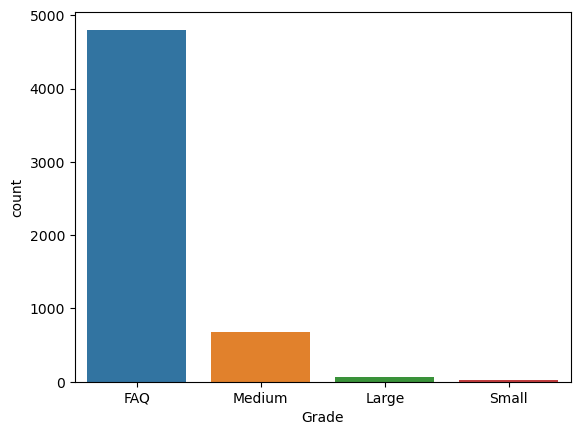

In [10]:
#lets visualise the variables
#grade represent the quality of commodity
sns.countplot(x= 'Grade', data=df)